## Introduction
This file is concerned with the first asssignment in the ST 443 group project. The task is to classify the observation to one of the eight vegetation classes based on the reflectance values for each pixel in the i-th wavelenght band, i $ \ \in \ \{1, 2, \ldots, 218\}$. We will start with T1.1, which is concerned with data visualization and understanding the distribution of the features, and the target.

## Task 1.1 - Visualization and Summary statistics

### Import

In [ ]:
#Imports from the standard library
import sys

#Third-party imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Local imports
sys.path.append("/Users/mihneapiuaru/Desktop/LSE Academic Courses/ST443/group_project/ml_project/src") 
from utilities import outlier_check

/Users/mihneapiuaru/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Read the zipped csv file

In [3]:
#Replace the path with the absolute path of your file
data1=pd.read_csv('/Users/mihneapiuaru/Desktop/LSE Academic Courses/ST443/group_project/ml_project/data/data-1.csv.gz')

### Inspect the dataset

In [4]:
#Shape of the dataframe
print(f"\n Number of Rows: {data1.shape[0]} \n Number of Columns: {data1.shape[1]}")


 Number of Rows: 215604 
 Number of Columns: 223


In [5]:
#Datatypes of all the columns in the dataset
data1.dtypes

land_type       object
p_x              int64
p_y              int64
Band_1         float64
Band_2         float64
                ...   
Band_216       float64
Band_217       float64
Band_218       float64
rgb_hex         object
overlay_hex     object
Length: 223, dtype: object

In [6]:
#Information about the dataset
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215604 entries, 0 to 215603
Columns: 223 entries, land_type to overlay_hex
dtypes: float64(218), int64(2), object(3)
memory usage: 366.8+ MB


In [7]:
#Look at the first 5 entries
data1.head()

,land_type,p_x,p_y,Band_1,Band_2,Band_3,Band_4,Band_5,Band_6,Band_7,...,Band_211,Band_212,Band_213,Band_214,Band_215,Band_216,Band_217,Band_218,rgb_hex,overlay_hex
0,valley floor / meadow,0,0,0.0174,0.0131,0.0108,0.0133,0.0158,0.0144,0.0151,...,0.0237,0.0231,0.0224,0.0246,0.0255,0.0174,0.0234,0.0147,#030B05,#25C77140
1,valley floor / meadow,1,0,0.0180,0.0124,0.0116,0.0143,0.0154,0.0136,0.0151,...,0.0289,0.0275,0.0288,0.0293,0.0286,0.0211,0.0229,0.0176,#040A09,#25C77140
2,valley floor / meadow,2,0,0.0151,0.0150,0.0113,0.0158,0.0167,0.0158,0.0163,...,0.0358,0.0319,0.0355,0.0274,0.0303,0.0232,0.0282,0.0181,#08110B,#25C77140
3,valley floor / meadow,3,0,0.0172,0.0149,0.0095,0.0156,0.0154,0.0169,0.0176,...,0.0310,0.0294,0.0307,0.0238,0.0304,0.0232,0.0247,0.0087,#0C160C,#25C77140
4,valley floor / meadow,4,0,0.0184,0.0149,0.0143,0.0189,0.0174,0.0174,0.0182,...,0.0428,0.0372,0.0407,0.0344,0.0415,0.0287,0.0317,0.0176,#0E180C,#25C77140


In [8]:
#Summary statistics of the float columns
data1.select_dtypes(include = "float64").describe()

,Band_1,Band_2,Band_3,Band_4,Band_5,Band_6,Band_7,Band_8,Band_9,Band_10,...,Band_209,Band_210,Band_211,Band_212,Band_213,Band_214,Band_215,Band_216,Band_217,Band_218
count,215604.000000,215604.000000,215604.000000,215604.000000,215604.000000,215604.000000,215604.000000,215604.000000,215604.000000,215604.000000,...,215604.000000,215604.000000,215604.000000,215604.000000,215604.000000,215604.000000,215604.000000,215604.000000,215604.000000,215604.000000
mean,0.095601,0.094335,0.095621,0.099081,0.100492,0.101252,0.102764,0.104476,0.105329,0.107272,...,0.110929,0.108438,0.108563,0.105381,0.105773,0.100424,0.099806,0.095834,0.092850,0.086839
std,0.164291,0.163833,0.165067,0.166807,0.167414,0.167216,0.167939,0.168141,0.168005,0.168948,...,0.059208,0.059431,0.059182,0.059277,0.058764,0.057765,0.056946,0.057251,0.054999,0.056024
min,-0.012000,-0.012600,-0.011900,-0.008800,-0.009300,-0.009000,-0.007700,-0.007500,-0.006600,-0.005300,...,0.007400,0.005700,0.006900,0.003600,0.006800,0.002400,0.004100,0.001100,0.000100,-0.010000
25%,0.022600,0.020600,0.020000,0.022900,0.023400,0.023800,0.024500,0.025500,0.025900,0.026900,...,0.058600,0.055700,0.056000,0.052500,0.053500,0.048900,0.048900,0.044400,0.043600,0.036300
50%,0.037800,0.036800,0.037700,0.040600,0.041600,0.042200,0.043400,0.045300,0.046200,0.047900,...,0.101100,0.098200,0.098200,0.094900,0.095000,0.089600,0.089000,0.085100,0.082300,0.076000
75%,0.078000,0.078000,0.081100,0.083800,0.086100,0.087700,0.090000,0.092700,0.094200,0.096900,...,0.157700,0.155500,0.155300,0.152500,0.152300,0.146400,0.145100,0.141500,0.136700,0.132000
max,1.581000,1.574100,1.587100,1.595900,1.603600,1.605300,1.609500,1.613800,1.608800,1.608500,...,0.453700,0.446600,0.453600,0.449000,0.446700,0.429900,0.435100,0.433000,0.429100,0.411200


In [9]:
#Missing values
missing_features = data1.select_dtypes(include = "float64").isna().sum().sum()
missing_target = data1['land_type'].isna().sum()
print(f"Total missing values in the feature space: {missing_features}")
print(f"Total missing target values: {missing_target}")

Total missing values in the feature space: 0
Total missing target values: 0


In [10]:
#Duplicates check
data1[data1.duplicated() == True]


,land_type,p_x,p_y,Band_1,Band_2,Band_3,Band_4,Band_5,Band_6,Band_7,...,Band_211,Band_212,Band_213,Band_214,Band_215,Band_216,Band_217,Band_218,rgb_hex,overlay_hex


No duplicates in this dataset. We can check for invalid values. Reflectance values should be in $[0,1]$.

In [11]:
bands = [col for col in data1.columns if col.startswith("B")]
print("Negative reflectance values:", (data1[bands] < 0).sum().sum())
print("Reflectance values > 1:", (data1[bands] > 1).sum().sum())

Negative reflectance values: 20000
Reflectance values > 1: 39777


There are invalid values in the dataset, so we should clip them.

In [12]:
#Clip the extreme values
data1[bands] = data1[bands].clip(lower=0, upper=1)
print("After clipping:")
print("Min reflectance:", data1[bands].min().min())
print("Max reflectance:", data1[bands].max().max())

After clipping:
Min reflectance: 0.0
Max reflectance: 1.0


We can check for values of 3 standard deviations away from mean to identify outliers.

In [13]:
outliers_number = outlier_check(data1, bands, 3)
percentage_of_outliers = outliers_number/data1.shape[0] * 100
print(f"Percentage of outliers: {percentage_of_outliers}")

Percentage of outliers: 5.166416207491512


Very few outliers, and we were very severe in flagging them. Normally, we would not expect features to follow a normal distribution, so there would be less outliers. No reason to drop them. We should check for imbalance by looking at the distribution of the vegetation classes.

In [14]:

# Check distribution of vegetation classes to indentify potential imbalance(may affect classification later)
class_counts = data1["land_type"].value_counts()
class_percent = data1["land_type"].value_counts(normalize=True) * 100

balance_df = pd.DataFrame({
    "Count": class_counts,
    "Percentage": class_percent.round(2)
}).reset_index().rename(columns={"index": "Land Type"})


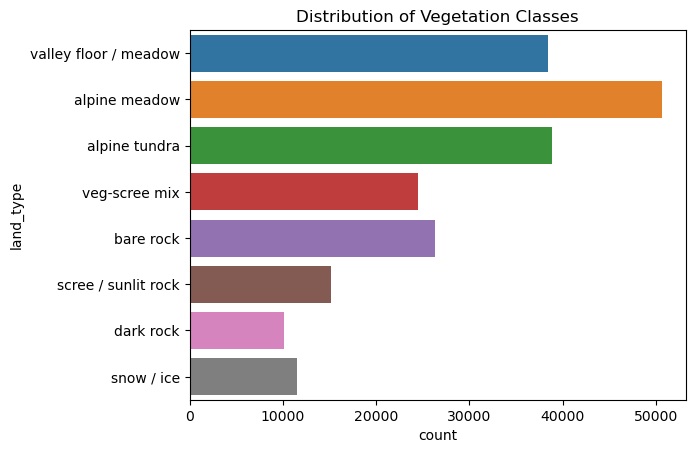

In [15]:
sns.countplot(y="land_type", data=data1)
plt.title("Distribution of Vegetation Classes")
plt.show()

We can observe that the alpine meadopw is the most frequent vegetation class, with around a quarter of the observations classified in this class. Also, valley floor and alpine tundra are also quite prevalent, and about 58% of all the observations are classified into one of this vegetation types.

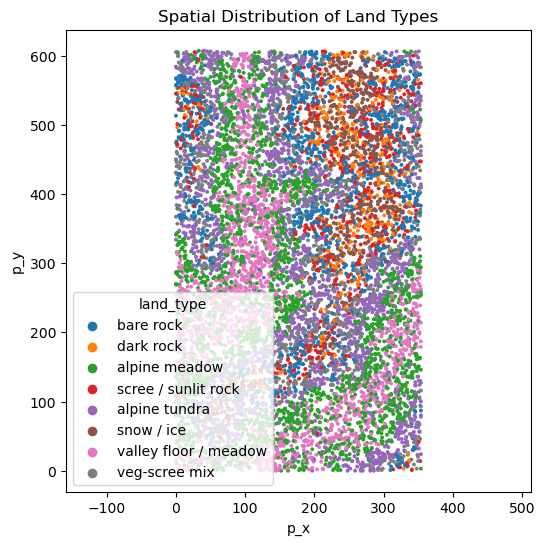

In [16]:
# Spatial distribution of land types (confirms figure 1 in the project description)
sample = data1.sample(10000, random_state=0)
plt.figure(figsize=(6,6))
sns.scatterplot(x="p_x", y="p_y", hue="land_type", data=sample, s=8, linewidth=0)
plt.title("Spatial Distribution of Land Types")
plt.axis("equal")
plt.show()

We should check if classes are separable in the spectral space.

In [17]:
# Check if classes are separable in spectral space
mean_spectra = data1.groupby("land_type")[bands].mean().T
mean_spectra

# Lines that differ strongly → those classes are spectrally separable → classification should work well.
# Overlapping lines → those classes are spectrally similar → may need nonlinear models (e.g. GBDT / SVM).
# Smoothness across bands → confirms that adjacent bands are highly correlated. Motivates PCA or regularisation later.

land_type,alpine meadow,alpine tundra,bare rock,dark rock,scree / sunlit rock,snow / ice,valley floor / meadow,veg-scree mix
Band_1,0.024688,0.039743,0.080441,0.304030,0.159906,0.685672,0.019638,0.061587
Band_2,0.022693,0.038833,0.080634,0.302374,0.160092,0.682125,0.017658,0.061243
Band_3,0.022188,0.039652,0.084026,0.305447,0.164070,0.686246,0.017099,0.063758
Band_4,0.024904,0.042673,0.086498,0.313921,0.168528,0.695479,0.019702,0.066261
Band_5,0.025452,0.043732,0.088971,0.316921,0.171769,0.698053,0.020141,0.067998
...,...,...,...,...,...,...,...,...
Band_214,0.061282,0.116874,0.182309,0.096537,0.147312,0.033467,0.040590,0.165270
Band_215,0.061064,0.115579,0.180517,0.097355,0.147048,0.034584,0.040641,0.163483
Band_216,0.056553,0.111538,0.177277,0.094289,0.143883,0.031539,0.035999,0.159682
Band_217,0.055030,0.107405,0.171452,0.091836,0.139566,0.031447,0.035443,0.153996


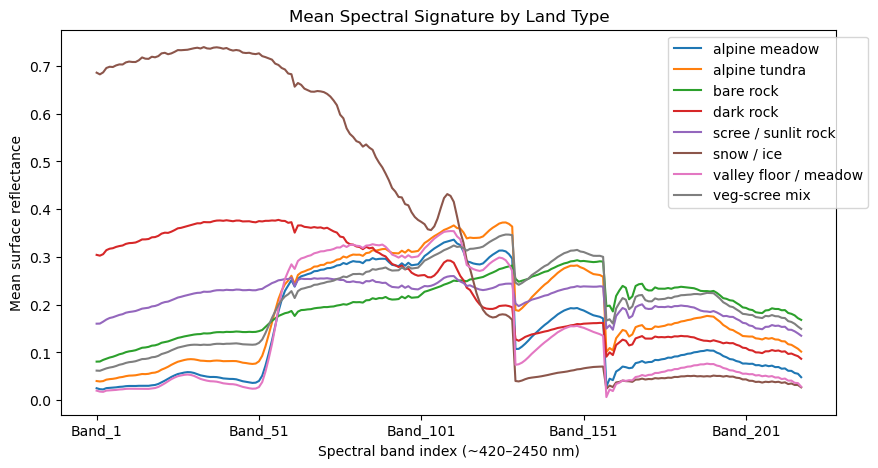

In [18]:
mean_spectra.plot(figsize=(10,5))
plt.xlabel("Spectral band index (~420–2450 nm)")
plt.ylabel("Mean surface reflectance")
plt.title("Mean Spectral Signature by Land Type")
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

Note that for Lines that differ strongly it means those classes are spectrally separable, so classification should work well. For the Overlapping lines the classes are spectrally similar, so may need nonlinear models (e.g. GBDT / SVM).
There is smoothness across bands, which confirms that adjacent bands are highly correlated. Motivates PCA or regularisation later.

Inspect the correlations across the features

In [19]:
#Correlation for the first 50 bands
corr50 = data1[bands[:50]].corr()
corr50.head()

,Band_1,Band_2,Band_3,Band_4,Band_5,Band_6,Band_7,Band_8,Band_9,Band_10,...,Band_41,Band_42,Band_43,Band_44,Band_45,Band_46,Band_47,Band_48,Band_49,Band_50
Band_1,1.000000,0.999913,0.999751,0.999725,0.999568,0.999415,0.999241,0.999069,0.998893,0.998669,...,0.987480,0.987046,0.986826,0.986319,0.985778,0.985245,0.984841,0.984364,0.984131,0.984004
Band_2,0.999913,1.000000,0.999900,0.999852,0.999749,0.999643,0.999507,0.999372,0.999228,0.999033,...,0.988637,0.988226,0.988020,0.987535,0.987021,0.986518,0.986121,0.985680,0.985458,0.985344
Band_3,0.999751,0.999900,1.000000,0.999895,0.999857,0.999800,0.999713,0.999626,0.999520,0.999370,...,0.989884,0.989494,0.989305,0.988850,0.988370,0.987901,0.987526,0.987124,0.986919,0.986813
Band_4,0.999725,0.999852,0.999895,1.000000,0.999946,0.999893,0.999819,0.999731,0.999636,0.999497,...,0.990457,0.990073,0.989879,0.989434,0.988956,0.988483,0.988133,0.987702,0.987495,0.987376
Band_5,0.999568,0.999749,0.999857,0.999946,1.000000,0.999958,0.999914,0.999852,0.999783,0.999673,...,0.991277,0.990907,0.990722,0.990297,0.989839,0.989387,0.989045,0.988637,0.988438,0.988324


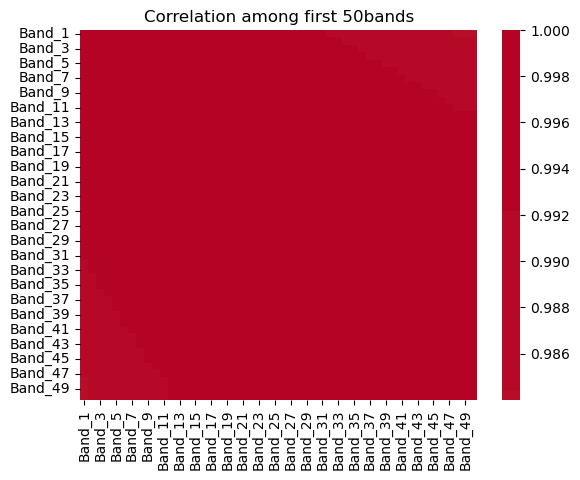

In [20]:
#Correlation heatmap for the first 50 bands
sns.heatmap(corr50, cmap="coolwarm", center=0)
plt.title("Correlation among first 50bands")
plt.show()

In [21]:
#Correlation among all the bands
corrfull = data1[bands].corr()
corrfull

,Band_1,Band_2,Band_3,Band_4,Band_5,Band_6,Band_7,Band_8,Band_9,Band_10,...,Band_209,Band_210,Band_211,Band_212,Band_213,Band_214,Band_215,Band_216,Band_217,Band_218
Band_1,1.000000,0.999913,0.999751,0.999725,0.999568,0.999415,0.999241,0.999069,0.998893,0.998669,...,-0.118024,-0.112026,-0.108653,-0.103823,-0.102215,-0.100490,-0.094597,-0.088633,-0.085640,-0.076818
Band_2,0.999913,1.000000,0.999900,0.999852,0.999749,0.999643,0.999507,0.999372,0.999228,0.999033,...,-0.112683,-0.106617,-0.103273,-0.098361,-0.096793,-0.095018,-0.089128,-0.083031,-0.080061,-0.071073
Band_3,0.999751,0.999900,1.000000,0.999895,0.999857,0.999800,0.999713,0.999626,0.999520,0.999370,...,-0.104604,-0.098490,-0.095150,-0.090173,-0.088617,-0.086801,-0.080892,-0.074699,-0.071755,-0.062641
Band_4,0.999725,0.999852,0.999895,1.000000,0.999946,0.999893,0.999819,0.999731,0.999636,0.999497,...,-0.105168,-0.099064,-0.095699,-0.090748,-0.089174,-0.087400,-0.081466,-0.075300,-0.072335,-0.063284
Band_5,0.999568,0.999749,0.999857,0.999946,1.000000,0.999958,0.999914,0.999852,0.999783,0.999673,...,-0.100995,-0.094867,-0.091493,-0.086508,-0.084935,-0.083146,-0.077187,-0.070987,-0.068010,-0.058924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Band_214,-0.100490,-0.095018,-0.086801,-0.087400,-0.083146,-0.080034,-0.076465,-0.072115,-0.068837,-0.065164,...,0.997632,0.998212,0.998386,0.998654,0.998687,1.000000,0.998516,0.998328,0.997761,0.996478
Band_215,-0.094597,-0.089128,-0.080892,-0.081466,-0.077187,-0.074064,-0.070480,-0.066120,-0.062836,-0.059145,...,0.997493,0.997988,0.998316,0.998611,0.998710,0.998516,1.000000,0.998478,0.998485,0.996351
Band_216,-0.088633,-0.083031,-0.074699,-0.075300,-0.070987,-0.067825,-0.064235,-0.059868,-0.056571,-0.052888,...,0.996589,0.997401,0.997556,0.998306,0.998227,0.998328,0.998478,1.000000,0.998332,0.997762
Band_217,-0.085640,-0.080061,-0.071755,-0.072335,-0.068010,-0.064843,-0.061230,-0.056865,-0.053564,-0.049870,...,0.995945,0.996650,0.997051,0.997647,0.997751,0.997761,0.998485,0.998332,1.000000,0.996819


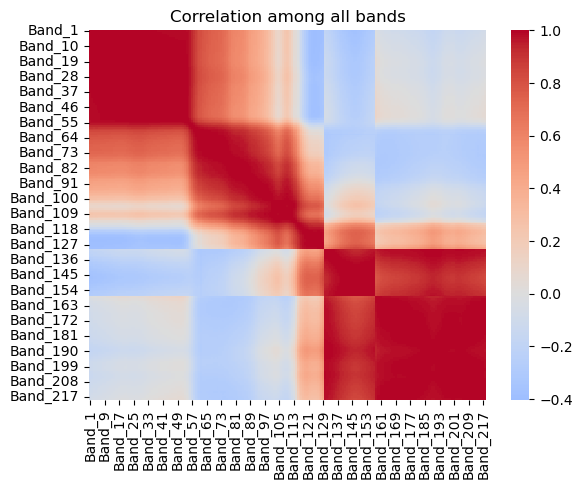

In [22]:

# Correlation heatmap for all bands
sns.heatmap(corrfull, cmap="coolwarm", center=0)
plt.title("Correlation among all bands")
plt.show()


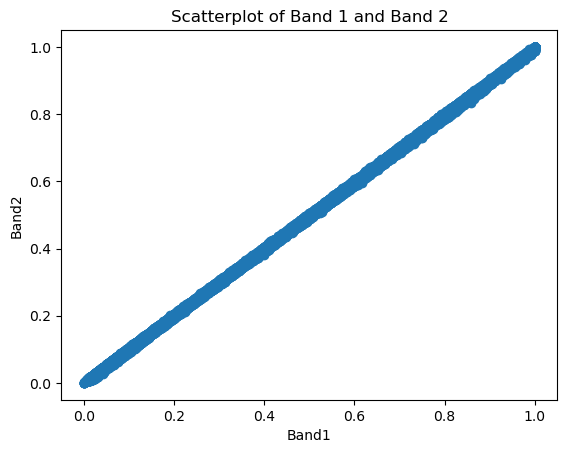

In [23]:
plt.scatter(data1["Band_1"], data1["Band_2"])
plt.xlabel("Band1")
plt.ylabel("Band2")
plt.title("Scatterplot of Band 1 and Band 2")
plt.show()

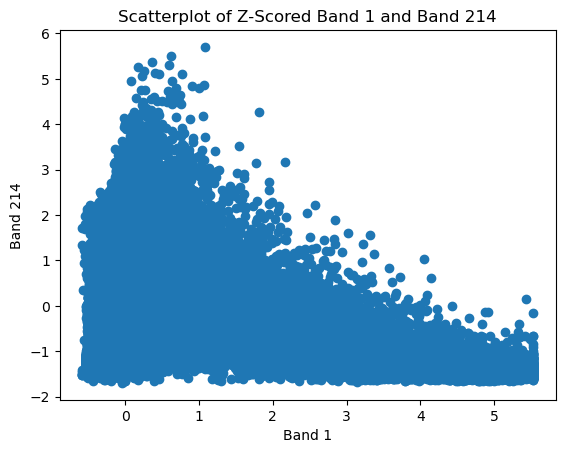

In [30]:
plt.scatter((data1["Band_1"] - data1["Band_1"].mean())/data1["Band_1"].std(), (data1["Band_214"] - data1["Band_214"].mean())/data1["Band_214"].std())
plt.xlabel("Band 1")
plt.ylabel("Band 214")
plt.title("Scatterplot of Z-Scored Band 1 and Band 214")
plt.show()

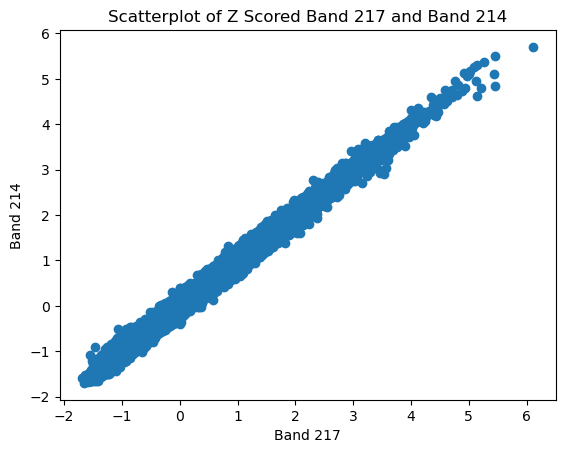

In [25]:
plt.scatter((data1["Band_217"] - data1["Band_217"].mean())/data1["Band_217"].std(), (data1["Band_214"] - data1["Band_214"].mean())/data1["Band_214"].std())
plt.xlabel("Band 217")
plt.ylabel("Band 214")
plt.title("Scatterplot of Z Scored Band 217 and Band 214")
plt.show()

We can observe that the correlation is larger among neighboring features. For example the average correlation is much larger when only the first 50 bands are considered than when all the bands are considered. Indeed, we can observe that correlation even becomes negative for some distant bands. We have defined distant bands in a very rough way, as the difference between distance labels.

We should also look at the conditional distributions of the bands to better understand the shape.

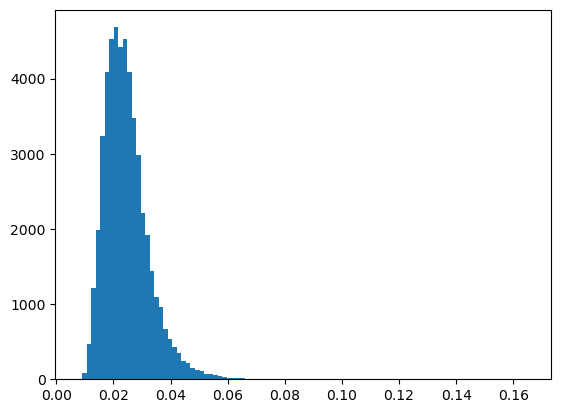

In [26]:
plt.hist(data1[data1["land_type"] == "alpine meadow"]["Band_1"], bins = 100)
plt.show()

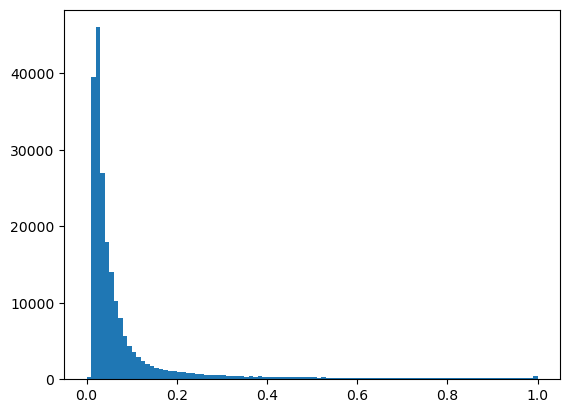

In [27]:
plt.hist(data1["Band_1"], bins = 100)
plt.show()

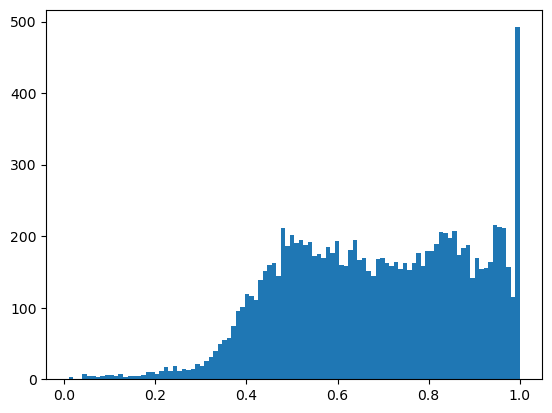

In [28]:
plt.hist(data1[data1["land_type"] == "snow / ice"]["Band_1"], bins = 100)
plt.show()

We can observe heterogeneous conditional distributions. In particular, Band 1 values are larger for the land type snow/ice, and many of the values achieve the maximumm threshold.

Before fitting the models, we will do two more tasks: Clustering and PCA. Clustering will helps us visualize the features more, and PCA will be able to help us for dimensionality reduction. Due to the large number of features, it might be helpful to do Clustering on the first principal components.

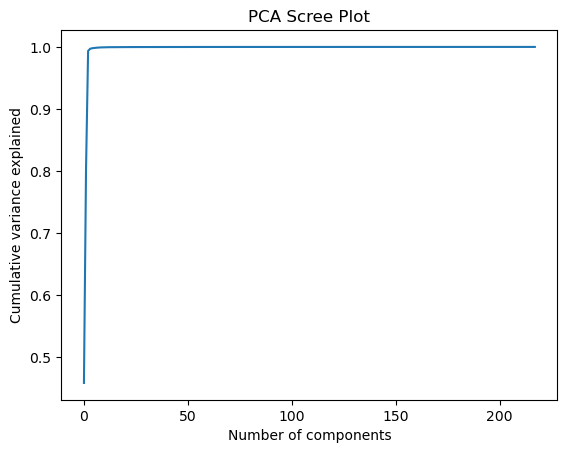

In [ ]:

X = StandardScaler().fit_transform(data1[bands])
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Cumulative variance explained")
plt.title("PCA Scree Plot")
plt.show()

# The curve rises very steeply at the beginning and then flattens quickly
# This suggests that a small number of components can capture most of the variance in the data, which is promising for dimensionality reduction before classification.